In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("noshow_data_v2 (1).csv")

In [3]:
#Exploratory Data Analysis
print("Head:\n",df.head(20),"\n=========================")
print("Info:\n",df.info(),"\n=========================")
print("Description:\n",df.describe(),"\n=========================")
print("Null values\n", df.isnull().sum(),"\n=========================")
print("Dupicates:", df.duplicated().sum(),"\n=========================")

Head:
     Patient_Id Gender Scheduled_Date Appointment_Date Appointment_time  Age  \
0     299000.0      F     2016-04-29       2016-04-29         22:05:00   62   
1    5590000.0      M     2016-04-29       2016-04-29         21:32:00   56   
2      42600.0      F     2016-04-29       2016-04-29         21:46:00   62   
3       8680.0      F     2016-04-29       2016-04-29         18:08:00    8   
4      88400.0      F     2016-04-29       2016-04-29         20:22:00   56   
5     960000.0      F     2016-04-27       2016-04-29         12:39:00   76   
6    7340000.0      F     2016-04-27       2016-04-29         17:30:00   23   
7      34500.0      F     2016-04-27       2016-04-29         15:50:00   39   
8     564000.0      F     2016-04-29       2016-04-29         17:40:00   21   
9     781000.0      F     2016-04-27       2016-04-29         15:58:00   19   
10   7350000.0      F     2016-04-27       2016-04-29         22:39:00   30   
11     75400.0      M     2016-04-26       20

In [4]:
df.dropna(inplace=True)

df['Patient_Id'] = df['Patient_Id'].astype(int)

#converting to datetime format
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])
df['Appointment_time'] = pd.to_datetime(df['Appointment_time'], format='%H:%M:%S')

df['Day_Difference'] = (df['Appointment_Date'] - df['Scheduled_Date']).dt.days
df['Day_Difference'] = df['Day_Difference'].astype(int)

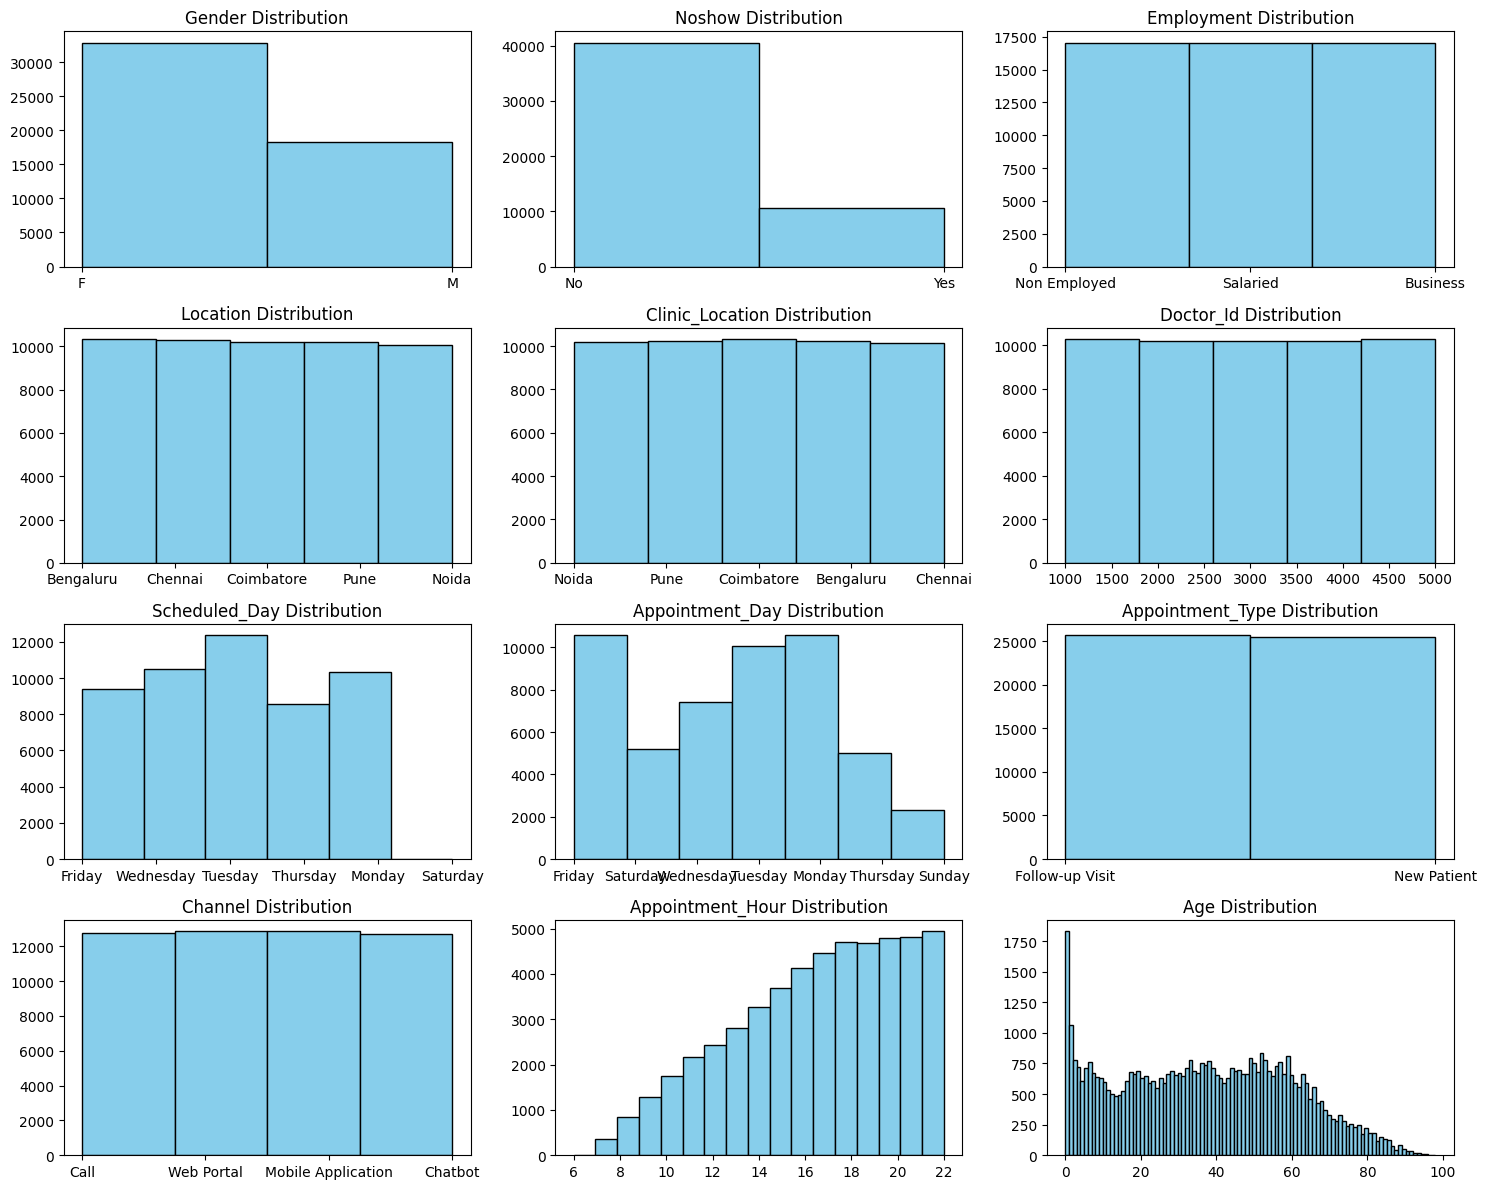

In [5]:
import matplotlib.pyplot as plt
import math

categorical_cols = ['Gender', 'Noshow', 'Employment', 'Location', 'Clinic_Location', 'Doctor_Id', 'Scheduled_Day', 'Appointment_Day', 'Appointment_Type', 'Channel']
numerical_cols = ['Patient_Id', 'Scheduled_Date','Appointment_Date', 'Appointment_time', 'Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Cancelled', 'Rate_Of_Cancellation', 'Day_Difference', 'Appointment_Hour']

# Create a list of columns for which you want to plot histograms
plot_columns = categorical_cols + ['Appointment_Hour', 'Age']

# Calculate the number of rows and columns for the grid
num_plots = len(plot_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, column in enumerate(plot_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]    
    ax.hist(df[column], bins=len(df[column].unique()), color='skyblue', edgecolor='black')
    
    ax.set_title(column + ' Distribution')
    
# Remove any empty subplots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust the layout
plt.tight_layout()
plt.show()


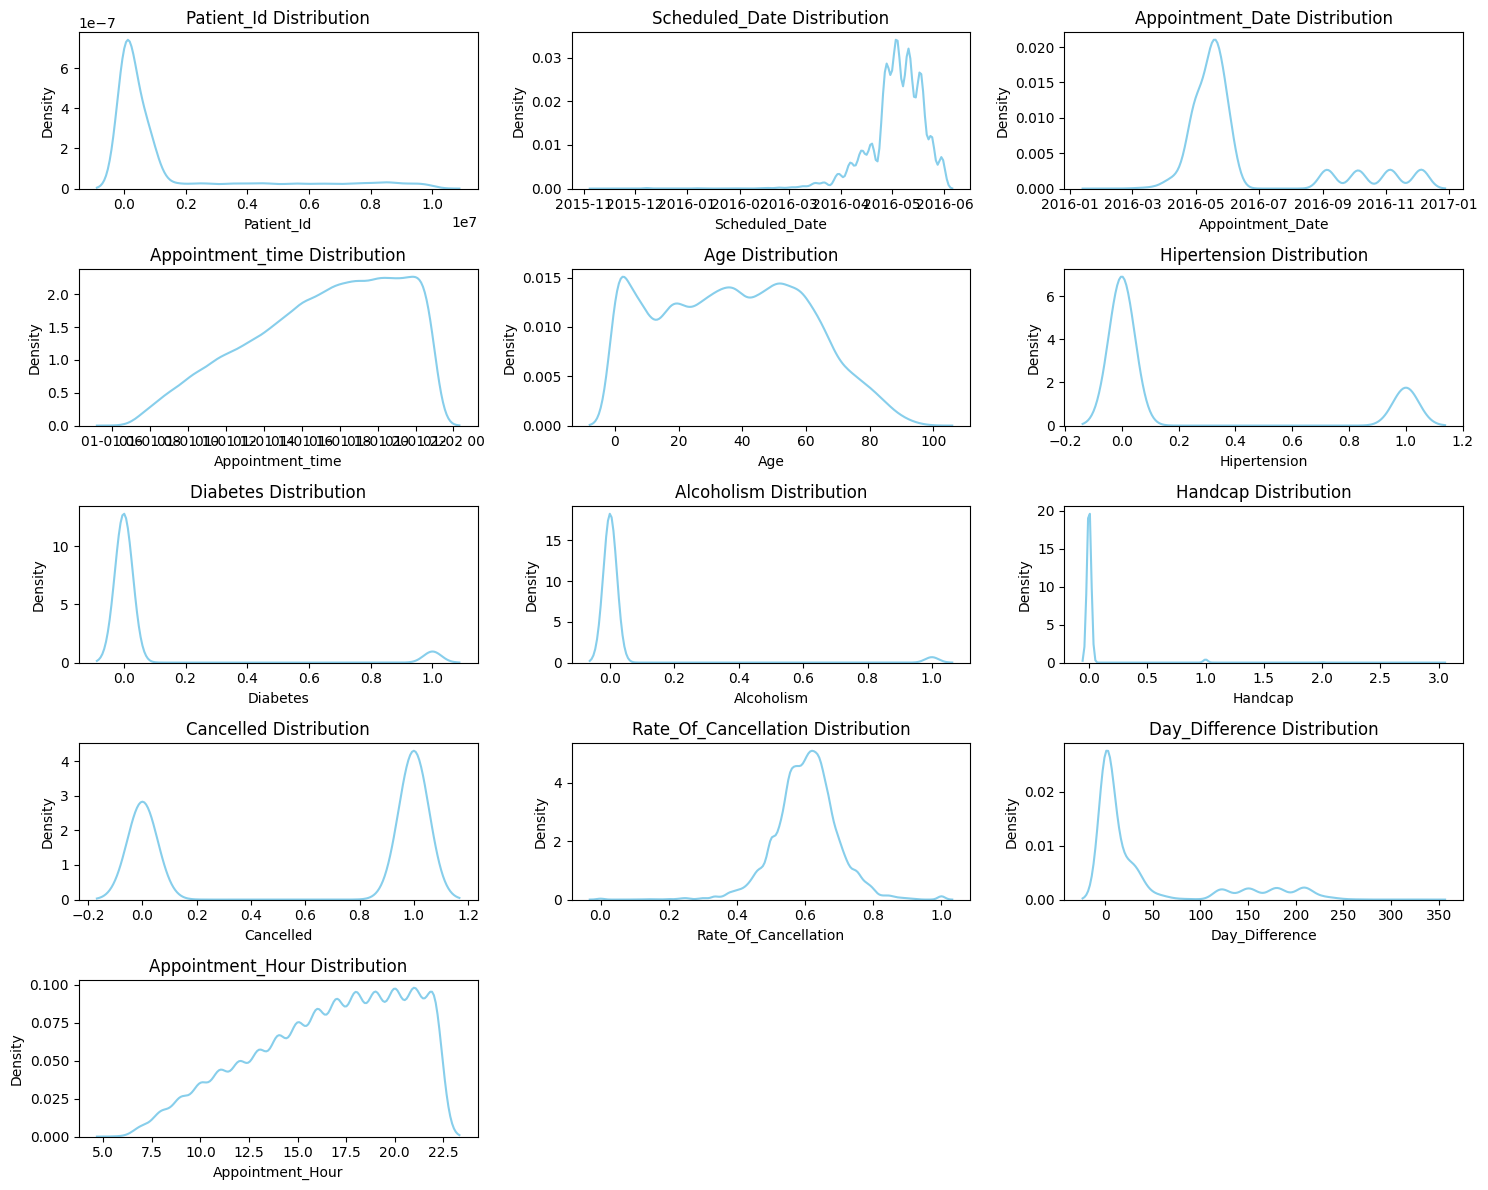

In [6]:
# Create a list of columns for which you want to plot KDE plots
plot_columns = numerical_cols

# Calculate the number of rows and columns for the grid
num_plots = len(plot_columns)
num_cols = 3  # Number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, column in enumerate(plot_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Use Seaborn to create KDE plots
    sns.kdeplot(df[column], color='skyblue', ax=ax)
    
    ax.set_title(column + ' Distribution')
    
# Remove any empty subplots
if num_plots < num_cols * num_rows:
    for i in range(num_plots, num_cols * num_rows):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust the layout
plt.tight_layout()
plt.show()

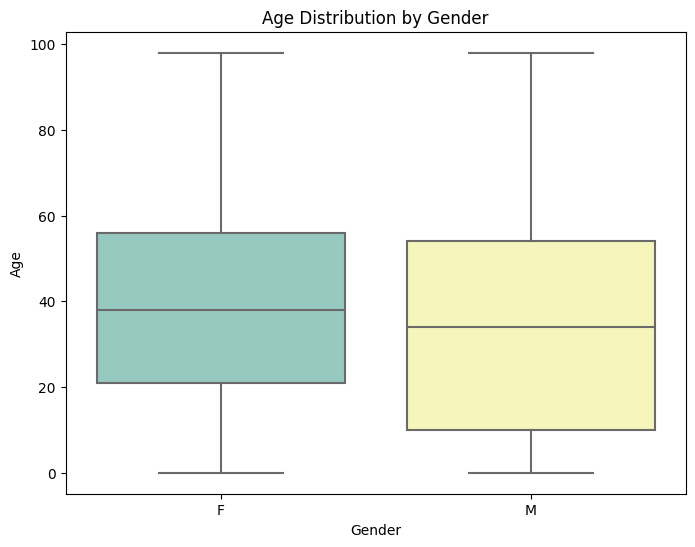

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Age', palette='Set3')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

C:\Users\anant\AppData\Local\Temp\ipykernel_6728\3207107009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


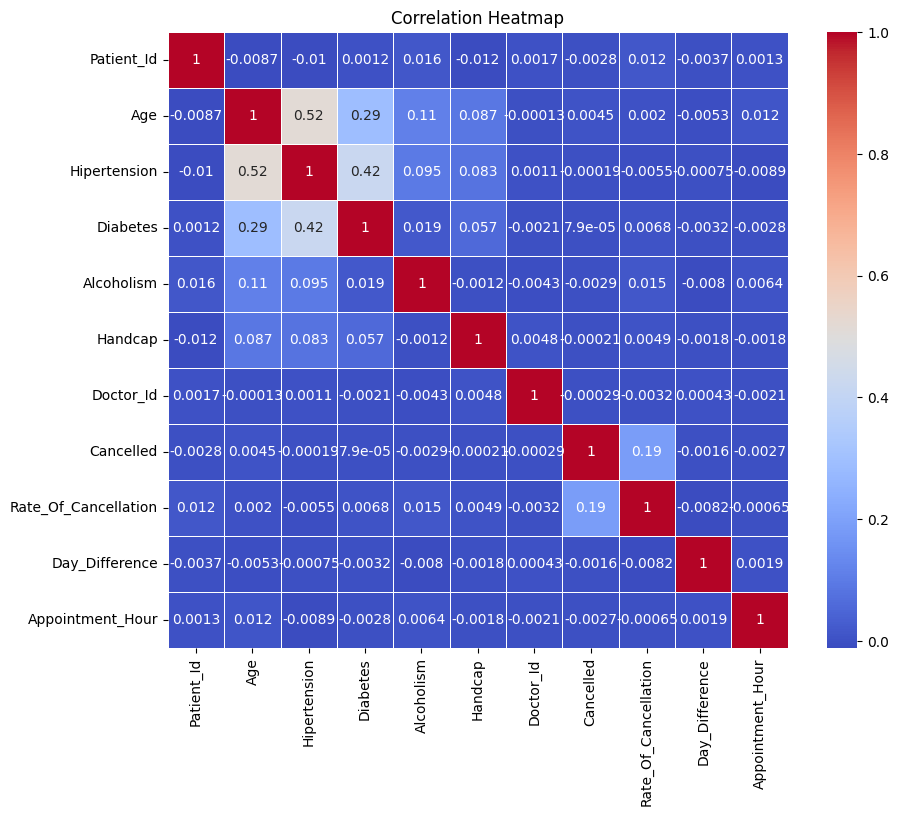

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


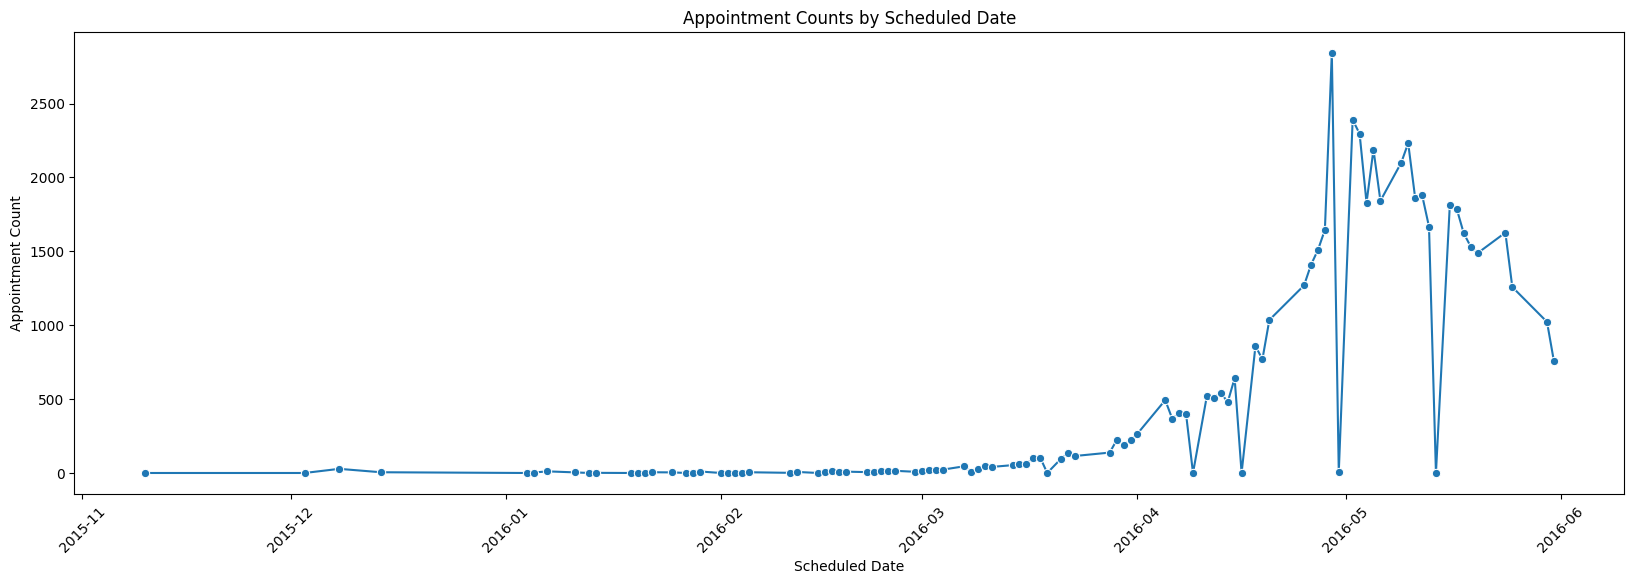

In [9]:
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Date'])
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Date'])

appointment_counts_by_day = df['Scheduled_Date'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
sns.lineplot(data=appointment_counts_by_day, marker='o')
plt.xlabel('Scheduled Date')
plt.ylabel('Appointment Count')
plt.title('Appointment Counts by Scheduled Date')
plt.xticks(rotation=45)
plt.show()

In [10]:
#data preprocessing

#label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_cols:
    df[i] = le.fit_transform(df[i])


#scaling age, day difference
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['Day_Difference'] = scaler.fit_transform(df['Day_Difference'].values.reshape(-1, 1))

df.to_csv('noshow_data_v3.csv', index=False)


In [11]:
#Training
X = df.drop(['Noshow'],axis=1) #['Noshow','Appointment_Date','Scheduled_Date','Appointment_time']
y = df['Noshow']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nontime_cols = X_train.columns.drop(['Appointment_Date','Scheduled_Date','Appointment_time'])
X_train = scaler.fit_transform(X_train[nontime_cols])
X_test = scaler.transform(X_test[nontime_cols])


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7960918417195897
Confusion Matrix:
[[8148    0]
 [2087    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8148
           1       0.00      0.00      0.00      2087

    accuracy                           0.80     10235
   macro avg       0.40      0.50      0.44     10235
weighted avg       0.63      0.80      0.71     10235



c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

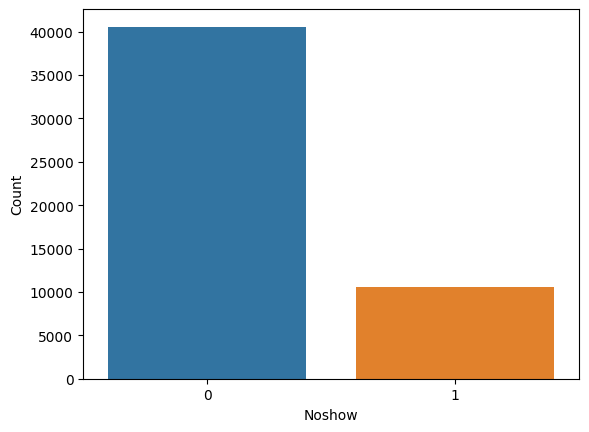

In [12]:
import seaborn as sns

sns.countplot(x='Noshow', data=df)
plt.xlabel('Noshow')
plt.ylabel('Count')
plt.show()

In [13]:
#oversampling minority class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.5307278944797265
Confusion Matrix:
[[4282 3866]
 [ 937 1150]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.53      0.64      8148
           1       0.23      0.55      0.32      2087

    accuracy                           0.53     10235
   macro avg       0.52      0.54      0.48     10235
weighted avg       0.70      0.53      0.58     10235



In [14]:
#undersampling majority class
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)


model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.5278944797264289
Confusion Matrix:
[[4285 3863]
 [ 969 1118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.53      0.64      8148
           1       0.22      0.54      0.32      2087

    accuracy                           0.53     10235
   macro avg       0.52      0.53      0.48     10235
weighted avg       0.70      0.53      0.57     10235



In [15]:
#Hyperparameter tuning - Grid Search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_ 
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.7960918417195897
Confusion Matrix:
[[8148    0]
 [2087    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8148
           1       0.00      0.00      0.00      2087

    accuracy                           0.80     10235
   macro avg       0.40      0.50      0.44     10235
weighted avg       0.63      0.80      0.71     10235



c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\anant\AppData\Local\Programs\Python\

In [16]:
#Hyperparameter tuning - Random Search
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  
    'solver': ['liblinear', 'lbfgs']
}

random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(best_model)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression(C=0.01, solver='liblinear')
Accuracy: 0.7960918417195897
Confusion Matrix:
[[8148    0]
 [2087    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8148
           1       0.00      0.00      0.00      2087

    accuracy                           0.80     10235
   macro avg       0.40      0.50      0.44     10235
weighted avg       0.63      0.80      0.71     10235



c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\anant\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Random Forest Classifier
print("Running Random Forest Classifier...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier")
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'Classification Report:\n{class_report_rf}')
print("Random Forest Classifier completed.")


Running Random Forest Classifier...
Random Forest Classifier
Accuracy: 0.7954079140205178
Confusion Matrix:
[[8121   27]
 [2067   20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      8148
           1       0.43      0.01      0.02      2087

    accuracy                           0.80     10235
   macro avg       0.61      0.50      0.45     10235
weighted avg       0.72      0.80      0.71     10235

Random Forest Classifier completed.


In [18]:

# k-Nearest Neighbors (KNN) Classifier
print("Running k-Nearest Neighbors (KNN) Classifier...")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("k-Nearest Neighbors (KNN) Classifier")
print(f'Accuracy: {accuracy_knn}')
print(f'Confusion Matrix:\n{conf_matrix_knn}')
print(f'Classification Report:\n{class_report_knn}')
print("k-Nearest Neighbors (KNN) Classifier completed.")


Running k-Nearest Neighbors (KNN) Classifier...
k-Nearest Neighbors (KNN) Classifier
Accuracy: 0.7583781143136297
Confusion Matrix:
[[7594  554]
 [1919  168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      8148
           1       0.23      0.08      0.12      2087

    accuracy                           0.76     10235
   macro avg       0.52      0.51      0.49     10235
weighted avg       0.68      0.76      0.71     10235

k-Nearest Neighbors (KNN) Classifier completed.


In [19]:
"""# Support Vector Machine (SVM) Classifier
print("Running Support Vector Machine (SVM) Classifier...")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Classifier")
print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{class_report_svm}')
print("Support Vector Machine (SVM) Classifier completed.")
"""

'# Support Vector Machine (SVM) Classifier\nprint("Running Support Vector Machine (SVM) Classifier...")\nsvm_model = SVC(random_state=42)\nsvm_model.fit(X_train, y_train)\ny_pred_svm = svm_model.predict(X_test)\naccuracy_svm = accuracy_score(y_test, y_pred_svm)\nconf_matrix_svm = confusion_matrix(y_test, y_pred_svm)\nclass_report_svm = classification_report(y_test, y_pred_svm)\n\nprint("Support Vector Machine (SVM) Classifier")\nprint(f\'Accuracy: {accuracy_svm}\')\nprint(f\'Confusion Matrix:\n{conf_matrix_svm}\')\nprint(f\'Classification Report:\n{class_report_svm}\')\nprint("Support Vector Machine (SVM) Classifier completed.")\n'